<a href="https://colab.research.google.com/github/akilic9/drl-coursework/blob/main/qlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CourseWork



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Policy Functions





### Greedy epsilon Decay Q-Learning:



In [ ]:
def Greedy_e_decay_q_l(alpha,gamma,epsilon_end,epsilon,decayrate):


  s = []
  episodes=[]
  returns=[]
  steps=[]
  epsilons=[]
  for i in range(25):
      s.append(str(i) + ',0')
  for i in range(25):
      s.append(str(i) + ',1')

  S = np.array(s)
  A = ['LEFT','RIGHT','UP','DOWN']

  fail_state = ['6,0', '6,1', '18,0', '18,1', '8,0', '8,1', '22,0']
  goal_state = '22,1'

  R =  np.array([[-1.0 for a in A] for s in S])

  for i in range(25):
    R[25+i] = -5

# Populate R matrix with possible actions + rewards until it matches the R matrix given in the tutorial notes.
# Empty = -1
# Cat = -50
# Cheese = 10
# House with cheese = 50
# House without cheese = -20
# Move with cheese = -5

# Slightly faster: define these as a list.
  cat_actions = [(5,1), (30,1), (7,1), (32,1), (17,1), (42,1), (7,0), (32,0), (19,0), (44,0), (9,0), (34,0), (11,2), (36,2), (13,2), (38,2), (23,2), (48,2), (1,3), (26,3), (3,3), (28,3), (13,3), (38,3)]
  cheese_actions = [(13,1), (9,3), (19,2)]
  hoouse_w_cheese = [(42,3), (46,1), (48,0)]
  house_wo_cheese = [(17,3), (23,0), (21,1)]
  boundaries = [(0,0), (5,0), (10,0), (15,0), (20,0), (25,0), (30,0), (35,0), (40,0), (45,0),
                (4,1), (9,1), (14,1), (19,1), (24,1), (29,1), (34,1), (39,1), (44,1), (49,1),
                (0,2), (1,2),  (2,2),  (3,2),  (4,2), (25,2), (26,2), (27,2), (28,2), (29,2),
                (20,3), (21,3), (22,3), (23,3), (24,3), (45,3), (46,3), (47,3), (48,3), (49,3)]

  for s,a in cat_actions:
    R[s,a] = -50
  for s,a in cheese_actions:
    R[s,a] = 10
  for s,a in hoouse_w_cheese:
    R[s,a] = 50
  for s,a in house_wo_cheese:
    R[s,a] = -20
  for s,a in boundaries:
    R[s,a] = np.NaN

# Q matrix
  Q = np.zeros(R.shape)

# Run
  for episode in range(1000):

      s = 0
      reward=0
      episodes.append(episode)

      timestep=0
      while True:
          timestep+=1
        # Action selection
          available_actions = np.where(~np.isnan(R[s]))[0]
          q_values = [Q[s,a] for a in available_actions]
          best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
          best_actions_q_values = [Q[s,x] for x in best_actions]

          if epsilon>epsilon_end:
            epsilon*=decayrate


        # Epsilon-greedy
          if np.random.uniform() < epsilon:
              a = np.random.choice(available_actions)
          else:
              a = np.random.choice(best_actions)

        # Environment updating
          r = R[s,a]
          s_old = s

          if (a == 0):
            s = s-1
          elif (a == 1):
            s = s+1
          elif (a == 2):
            s -= 5
          elif (a == 3):
            s += 5

          if (s == 14):
            s += 25

          # Q value updating
          Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])
          reward+=Q[s_old,a]
          if ((S[s] == goal_state)):
            steps.append(timestep)
            returns.append(reward)
            epsilons.append(epsilon)
            break
  Returns=np.array(returns)
  return_avg=Returns.cumsum() / np.arange(1, len(Returns) + 1)


  return episodes,return_avg,steps,epsilons

####Parameter Changes

#####Alpha

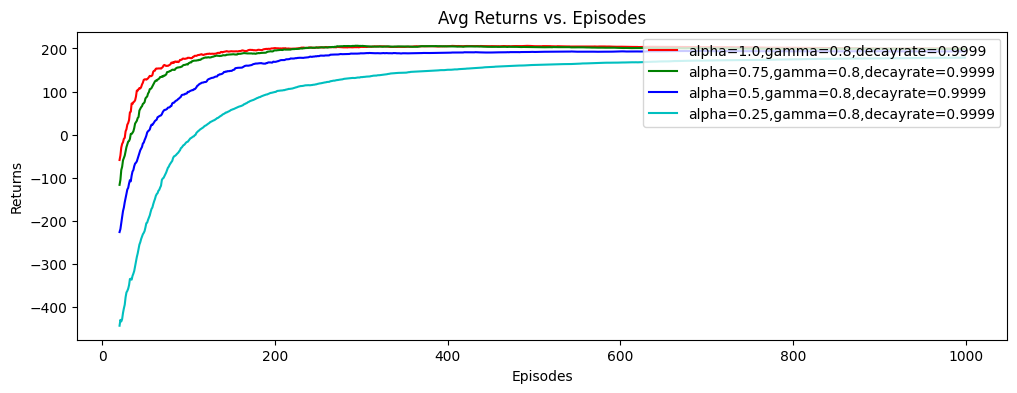

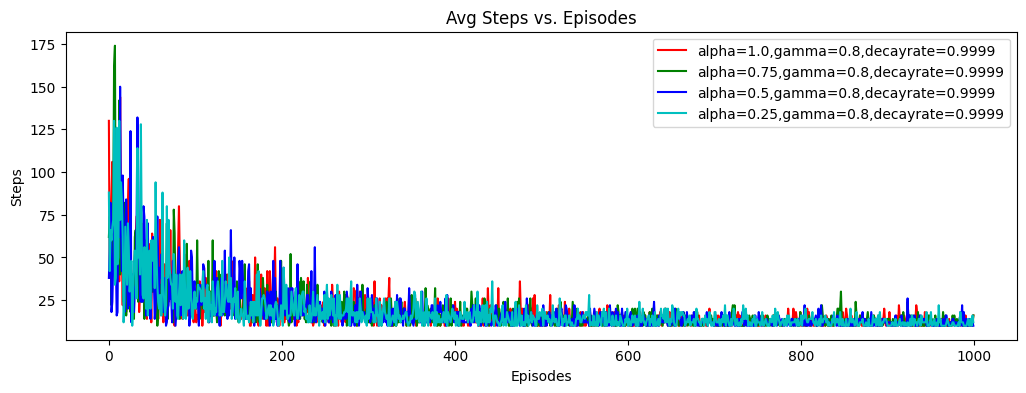

In [ ]:
episodes_0,returns_0,steps_0,epsilons_0=Greedy_e_decay_q_l(1.0,0.8,0.1,0.99,0.9999)
episodes_1,returns_1,steps_1,epsilons_1=Greedy_e_decay_q_l(0.75,0.8,0.1,0.99,0.9999)
episodes_2,returns_2,steps_2,epsilons_2=Greedy_e_decay_q_l(0.5,0.8,0.1,0.99,0.9999)
episodes_3,returns_3,steps_3,epsilons_3=Greedy_e_decay_q_l(0.25,0.8,0.1,0.99,0.9999)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)


plt.plot(np.arange(20, len(returns_0)), returns_0[20:],'r',label=f'alpha={1.0},gamma=0.8,decayrate=0.9999')
plt.plot(np.arange(20, len(returns_1)), returns_1[20:],'g',label=f'alpha={0.75},gamma=0.8,decayrate=0.9999')
plt.plot(np.arange(20, len(returns_2)), returns_2[20:],'b',label=f'alpha={0.5},gamma=0.8,decayrate=0.9999')
plt.plot(np.arange(20, len(returns_3)), returns_3[20:],'c',label=f'alpha={0.25},gamma=0.8,decayrate=0.9999')
plt.legend(loc="upper right")

plt.title("Avg Returns vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.show()

f = plt.figure()
f.set_figwidth(12.27)
f.set_figheight(4)
plt.plot(episodes_0, steps_0,'r',label=f'alpha={1.0},gamma=0.8,decayrate=0.9999')
plt.plot(episodes_1, steps_1,'g',label=f'alpha={0.75},gamma=0.8,decayrate=0.9999')
plt.plot(episodes_2, steps_2,'b',label=f'alpha={0.5},gamma=0.8,decayrate=0.9999')
plt.plot(episodes_3, steps_3,'c',label=f'alpha={0.25},gamma=0.8,decayrate=0.9999')
plt.legend(loc="upper right")

plt.title("Avg Steps vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Steps")
plt.show()

#####Gamma

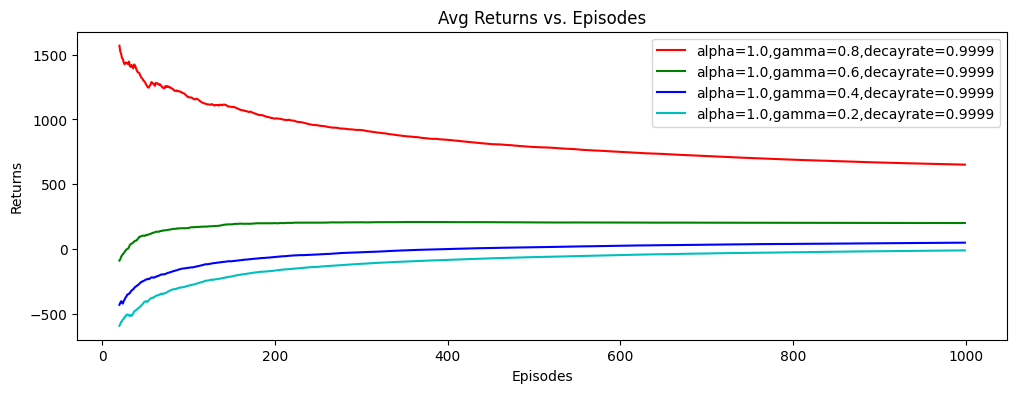

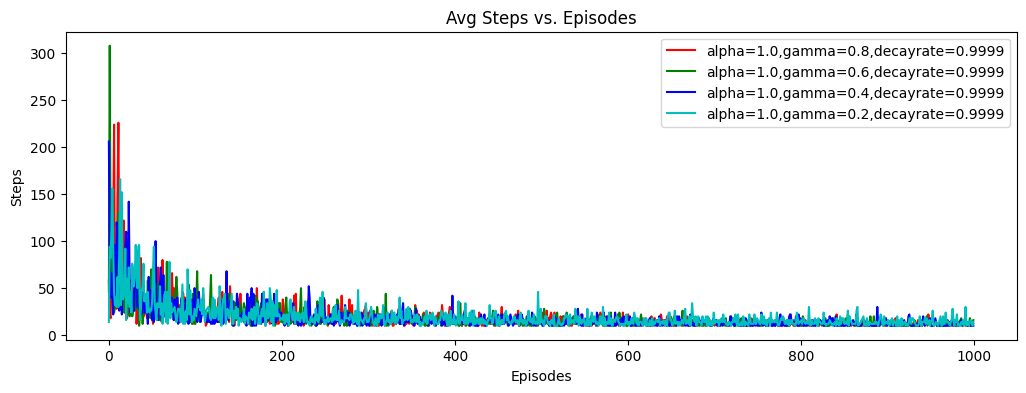

In [ ]:
episodes_0,returns_0,steps_0,epsilons_0=Greedy_e_decay_q_l(1,1,0.1,0.99,0.9999)
episodes_1,returns_1,steps_1,epsilons_1=Greedy_e_decay_q_l(1,0.8,0.1,0.99,0.9999)
episodes_2,returns_2,steps_2,epsilons_2=Greedy_e_decay_q_l(1,0.6,0.1,0.99,0.9999)
episodes_3,returns_3,steps_3,epsilons_3=Greedy_e_decay_q_l(1,0.4,0.1,0.99,0.9999)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)


plt.plot(np.arange(20, len(returns_0)), returns_0[20:],'r',label=f'alpha=1.0,gamma=0.8,decayrate=0.9999')
plt.plot(np.arange(20, len(returns_1)), returns_1[20:],'g',label=f'alpha=1.0,gamma=0.6,decayrate=0.9999')
plt.plot(np.arange(20, len(returns_2)), returns_2[20:],'b',label=f'alpha=1.0,gamma=0.4,decayrate=0.9999')
plt.plot(np.arange(20, len(returns_3)), returns_3[20:],'c',label=f'alpha=1.0,gamma=0.2,decayrate=0.9999')
plt.legend(loc="upper right")

plt.title("Avg Returns vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.show()

f = plt.figure()
f.set_figwidth(12.27)
f.set_figheight(4)
plt.plot(episodes_0, steps_0,'r',label=f'alpha=1.0,gamma=0.8,decayrate=0.9999')
plt.plot(episodes_1, steps_1,'g',label=f'alpha=1.0,gamma=0.6,decayrate=0.9999')
plt.plot(episodes_2, steps_2,'b',label=f'alpha=1.0,gamma=0.4,decayrate=0.9999')
plt.plot(episodes_3, steps_3,'c',label=f'alpha=1.0,gamma=0.2,decayrate=0.9999')
plt.legend(loc="upper right")

plt.title("Avg Steps vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Steps")
plt.show()

#####Epsilon Decay

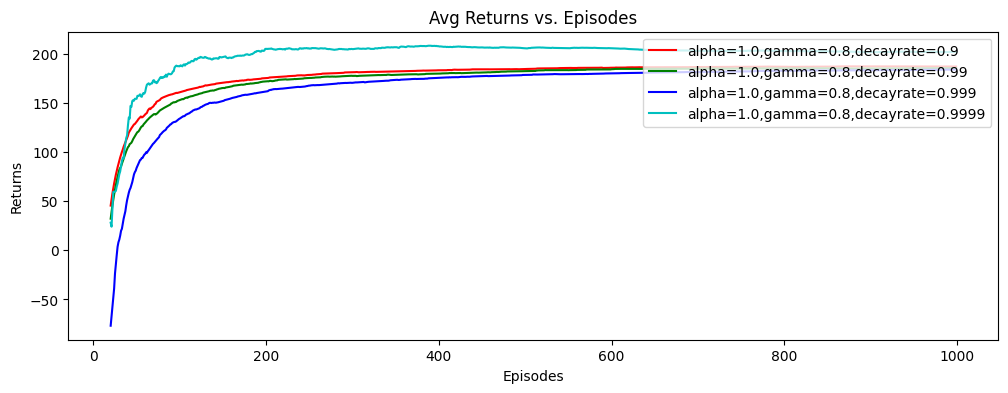

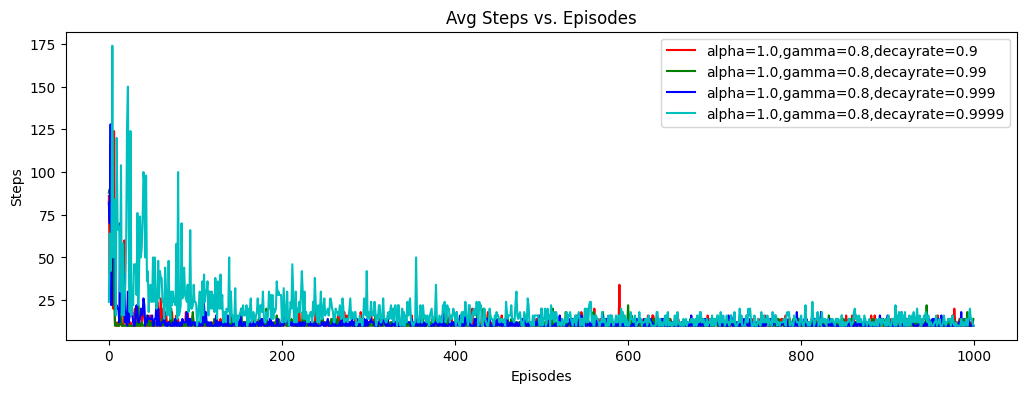

In [ ]:
episodes_0,returns_0,steps_0,epsilons_0=Greedy_e_decay_q_l(1,0.8,0.1,0.99,0.9)
episodes_1,returns_1,steps_1,epsilons_1=Greedy_e_decay_q_l(1,0.8,0.1,0.99,0.99)
episodes_2,returns_2,steps_2,epsilons_2=Greedy_e_decay_q_l(1,0.8,0.1,0.99,0.999)
episodes_3,returns_3,steps_3,epsilons_3=Greedy_e_decay_q_l(1,0.8,0.1,0.99,0.9999)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)


plt.plot(np.arange(20, len(returns_0)), returns_0[20:],'r',label=f'alpha=1.0,gamma=0.8,decayrate=0.9')
plt.plot(np.arange(20, len(returns_1)), returns_1[20:],'g',label=f'alpha=1.0,gamma=0.8,decayrate=0.99')
plt.plot(np.arange(20, len(returns_2)), returns_2[20:],'b',label=f'alpha=1.0,gamma=0.8,decayrate=0.999')
plt.plot(np.arange(20, len(returns_3)), returns_3[20:],'c',label=f'alpha=1.0,gamma=0.8,decayrate=0.9999')
plt.legend(loc="upper right")

plt.title("Avg Returns vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.show()

f = plt.figure()
f.set_figwidth(12.27)
f.set_figheight(4)
plt.plot(episodes_0, steps_0,'r',label=f'alpha=1.0,gamma=0.8,decayrate=0.9')
plt.plot(episodes_1, steps_1,'g',label=f'alpha=1.0,gamma=0.8,decayrate=0.99')
plt.plot(episodes_2, steps_2,'b',label=f'alpha=1.0,gamma=0.8,decayrate=0.999')
plt.plot(episodes_3, steps_3,'c',label=f'alpha=1.0,gamma=0.8,decayrate=0.9999')
plt.legend(loc="upper right")

plt.title("Avg Steps vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Steps")
plt.show()

###Random Choice

In [ ]:
def Random_Q_Learning(alpha,gamma):



  s = []
  episodes=[]
  returns=[]
  steps=[]
  for i in range(25):
      s.append(str(i) + ',0')
  for i in range(25):
      s.append(str(i) + ',1')

  S = np.array(s)
  A = ['LEFT','RIGHT','UP','DOWN']

  fail_state = ['6,0', '6,1', '18,0', '18,1', '8,0', '8,1', '22,0']
  goal_state = '22,1'

  R =  np.array([[-1.0 for a in A] for s in S])

  for i in range(25):
    R[25+i] = -5

  # Populate R matrix with possible actions + rewards until it matches the R matrix given in the tutorial notes.
  # Empty = -1
  # Cat = -50
  # Cheese = 10
  # House with cheese = 50
  # House without cheese = -20
  # Move with cheese = -5

  # Slightly faster: define these as a list.
  cat_actions = [(5,1), (30,1), (7,1), (32,1), (17,1), (42,1), (7,0), (32,0), (19,0), (44,0), (9,0), (34,0), (11,2), (36,2), (13,2), (38,2), (23,2), (48,2), (1,3), (26,3), (3,3), (28,3), (13,3), (38,3)]
  cheese_actions = [(13,1), (9,3), (19,2)]
  hoouse_w_cheese = [(42,3), (46,1), (48,0)]
  house_wo_cheese = [(17,3), (23,0), (21,1)]
  boundaries = [(0,0), (5,0), (10,0), (15,0), (20,0), (25,0), (30,0), (35,0), (40,0), (45,0),
                (4,1), (9,1), (14,1), (19,1), (24,1), (29,1), (34,1), (39,1), (44,1), (49,1),
                (0,2), (1,2),  (2,2),  (3,2),  (4,2), (25,2), (26,2), (27,2), (28,2), (29,2),
                (20,3), (21,3), (22,3), (23,3), (24,3), (45,3), (46,3), (47,3), (48,3), (49,3)]

  for s,a in cat_actions:
    R[s,a] = -50
  for s,a in cheese_actions:
    R[s,a] = 10
  for s,a in hoouse_w_cheese:
    R[s,a] = 50
  for s,a in house_wo_cheese:
    R[s,a] = -20
  for s,a in boundaries:
    R[s,a] = np.NaN

  # Q matrix
  Q = np.zeros(R.shape)

  # Run
  for episode in range(500):

      s = 0
      reward=0
      episodes.append(episode)
      for timestep in range(1000):
          # Action selection
          available_actions = np.where(~np.isnan(R[s]))[0]
          q_values = [Q[s,a] for a in available_actions]


          # Epsilon-greedy

          a = np.random.choice(available_actions)


          # Environment updating
          r = R[s,a]
          s_old = s

          if (a == 0):
            s = s-1
          elif (a == 1):
            s = s+1
          elif (a == 2):
            s -= 5
          elif (a == 3):
            s += 5

          if (s == 14):
            s += 25

          # Q value updating
          Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])
          reward+=Q[s_old,a]
          if ((S[s] == goal_state)  or timestep>=499):
            steps.append(timestep)
            returns.append(reward)
            break

  Returns=np.array(returns)
  return_avg=Returns.cumsum() / np.arange(1, len(Returns) + 1)
  return episodes,return_avg,steps

#### Parameter Changes

#####Alpha

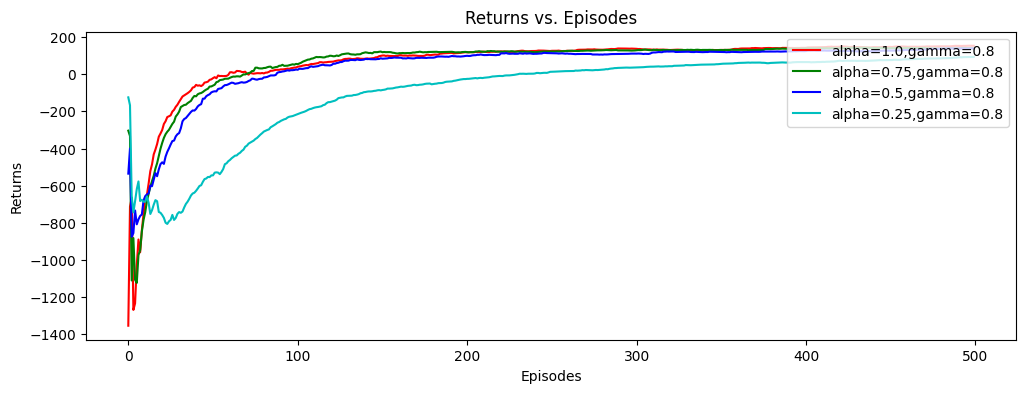

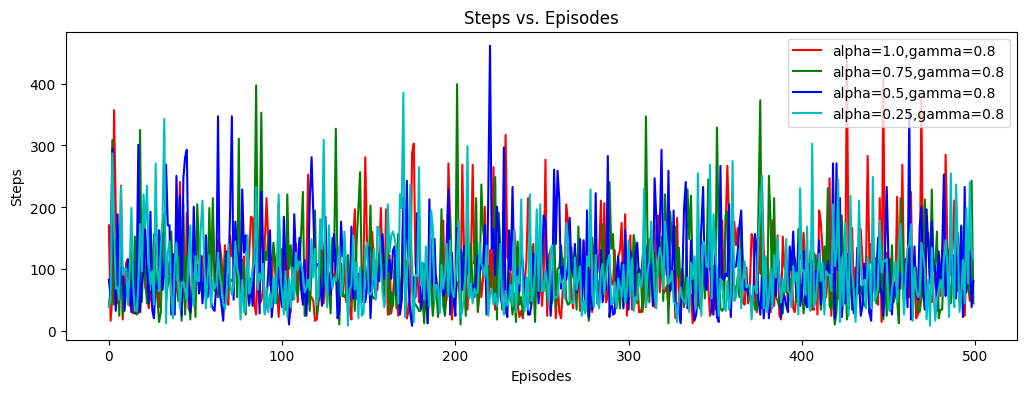

In [ ]:
episodes_0,returns_0,steps_0=Random_Q_Learning(1,0.8)
episodes_1,returns_1,steps_1=Random_Q_Learning(0.75,0.8)
episodes_2,returns_2,steps_2=Random_Q_Learning(0.5,0.8)
episodes_3,returns_3,steps_3=Random_Q_Learning(0.25,0.8)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)


plt.plot(episodes_0,returns_0,'r',label=f'alpha=1.0,gamma=0.8')
plt.plot(episodes_1,returns_1,'g',label=f'alpha=0.75,gamma=0.8')
plt.plot(episodes_2,returns_2,'b',label=f'alpha=0.5,gamma=0.8')
plt.plot(episodes_3,returns_3,'c',label=f'alpha=0.25,gamma=0.8')
plt.legend(loc="upper right")

plt.title("Returns vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.show()

f = plt.figure()
f.set_figwidth(12.27)
f.set_figheight(4)
plt.plot(episodes_0,steps_0,'r',label=f'alpha=1.0,gamma=0.8')
plt.plot(episodes_1,steps_1,'g',label=f'alpha=0.75,gamma=0.8')
plt.plot(episodes_2,steps_2,'b',label=f'alpha=0.5,gamma=0.8')
plt.plot(episodes_3,steps_3,'c',label=f'alpha=0.25,gamma=0.8')
plt.legend(loc="upper right")

plt.title("Steps vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Steps")
plt.show()

#####Gamma

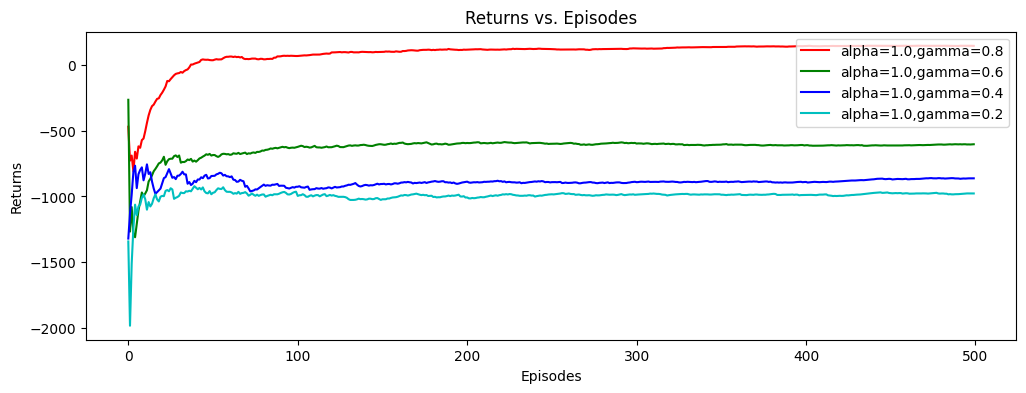

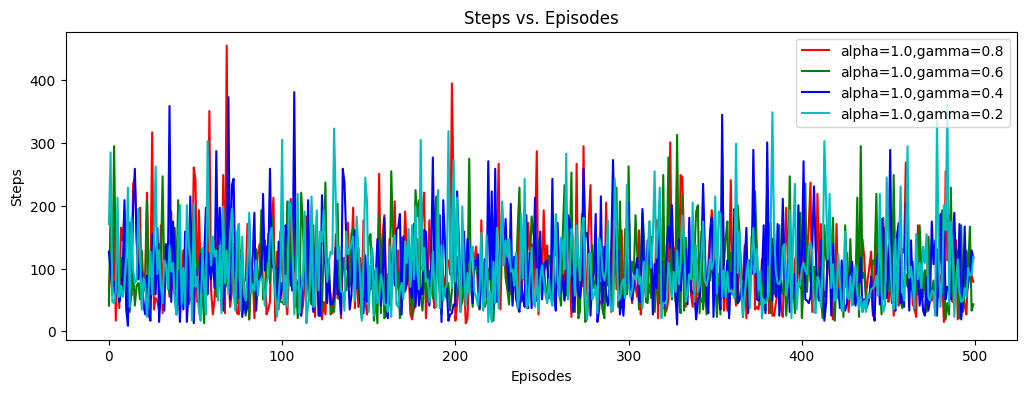

In [ ]:
episodes_0,returns_0,steps_0=Random_Q_Learning(1,0.8)
episodes_1,returns_1,steps_1=Random_Q_Learning(1,0.6)
episodes_2,returns_2,steps_2=Random_Q_Learning(1,0.4)
episodes_3,returns_3,steps_3=Random_Q_Learning(1,0.2)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)


plt.plot(episodes_0,returns_0,'r',label=f'alpha=1.0,gamma=0.8')
plt.plot(episodes_1,returns_1,'g',label=f'alpha=1.0,gamma=0.6')
plt.plot(episodes_2,returns_2,'b',label=f'alpha=1.0,gamma=0.4')
plt.plot(episodes_3,returns_3,'c',label=f'alpha=1.0,gamma=0.2')
plt.legend(loc="upper right")

plt.title("Returns vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.show()

f = plt.figure()
f.set_figwidth(12.27)
f.set_figheight(4)
plt.plot(episodes_0,steps_0,'r',label=f'alpha=1.0,gamma=0.8')
plt.plot(episodes_1,steps_1,'g',label=f'alpha=1.0,gamma=0.6')
plt.plot(episodes_2,steps_2,'b',label=f'alpha=1.0,gamma=0.4')
plt.plot(episodes_3,steps_3,'c',label=f'alpha=1.0,gamma=0.2')
plt.legend(loc="upper right")

plt.title("Steps vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Steps")
plt.show()

###Boltzmann policy

In [ ]:
def Get_next_action(R,Q,state,Temperature):
  available_actions = np.where(~np.isnan(R[state]))[0]
  q_values = [Q[state,a] for a in available_actions]

  dividend=0
  for b in available_actions:
    dividend+=np.exp(Q[state,b]/Temperature)
  probabilities = [np.exp(Q[state,a]/Temperature)/dividend for a in available_actions]
  a= np.random.choice(available_actions,p=probabilities)
  return a

def Switch_state(state,action):
  if (action == 0):
    state = state-1
  elif (action == 1):
    state = state+1
  elif (action == 2):
    state -= 5
  elif (action == 3):
    state += 5

  if (state == 14):
    state += 25

  return state

def Boltzmann_policy(alpha,gamma,Temperature):
  s = []
  episodes=[]
  returns=[]
  steps=[]
  epsilons=[]
  for i in range(25):
      s.append(str(i) + ',0')
  for i in range(25):
      s.append(str(i) + ',1')

  S = np.array(s)
  A = ['LEFT','RIGHT','UP','DOWN']

  fail_state = ['6,0', '6,1', '18,0', '18,1', '8,0', '8,1', '22,0']
  goal_state = '22,1'

  R =  np.array([[-1.0 for a in A] for s in S])

  for i in range(25):
    R[25+i] = -5

# Populate R matrix with possible actions + rewards until it matches the R matrix given in the tutorial notes.
# Empty = -1
# Cat = -50
# Cheese = 10
# House with cheese = 50
# House without cheese = -20
# Move with cheese = -5

# Slightly faster: define these as a list.
  cat_actions = [(5,1), (30,1), (7,1), (32,1), (17,1), (42,1), (7,0), (32,0), (19,0), (44,0), (9,0), (34,0), (11,2), (36,2), (13,2), (38,2), (23,2), (48,2), (1,3), (26,3), (3,3), (28,3), (13,3), (38,3)]
  cheese_actions = [(13,1), (9,3), (19,2)]
  hoouse_w_cheese = [(42,3), (46,1), (48,0)]
  house_wo_cheese = [(17,3), (23,0), (21,1)]
  boundaries = [(0,0), (5,0), (10,0), (15,0), (20,0), (25,0), (30,0), (35,0), (40,0), (45,0),
                (4,1), (9,1), (14,1), (19,1), (24,1), (29,1), (34,1), (39,1), (44,1), (49,1),
                (0,2), (1,2),  (2,2),  (3,2),  (4,2), (25,2), (26,2), (27,2), (28,2), (29,2),
                (20,3), (21,3), (22,3), (23,3), (24,3), (45,3), (46,3), (47,3), (48,3), (49,3)]

  for s,a in cat_actions:
    R[s,a] = -50
  for s,a in cheese_actions:
    R[s,a] = 10
  for s,a in hoouse_w_cheese:
    R[s,a] = 50
  for s,a in house_wo_cheese:
    R[s,a] = -20
  for s,a in boundaries:
    R[s,a] = np.NaN

# Q matrix
  Q = np.zeros(R.shape)


  for episode in range(1000):
    s = 0
    reward=0
    episodes.append(episode)

    for timestep in range(1000):
      a = Get_next_action(R,Q,s,Temperature)

      # Environment updating
      r = R[s,a]
      s_old = s

      if (a == 0):
        s = s-1
      elif (a == 1):
        s = s+1
      elif (a == 2):
        s -= 5
      elif (a == 3):
        s += 5

      if (s == 14):
        s += 25


      # Q value updating
      Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])
      reward+=Q[s_old,a]
      if ((S[s] == goal_state)  or timestep>=999):
        steps.append(timestep)
        returns.append(reward)
        break

  Returns=np.array(returns)
  return_avg=Returns.cumsum() / np.arange(1, len(Returns) + 1)
  return episodes,returns,steps

#### Parameter Changes

#####Alpha

In [ ]:
episodes_0,returns_0,steps_0=Boltzmann_policy(1,0.8,2)
episodes_1,returns_1,steps_1=Boltzmann_policy(0.75,0.8,2)
episodes_2,returns_2,steps_2=Boltzmann_policy(0.5,0.8,2)
episodes_3,returns_3,steps_3=Boltzmann_policy(0.25,0.8,2)
f=plt.figure()
f.set_figwidth(12)
f.set_figheight(4)


plt.plot(episodes_0,returns_0,'r',label=f'alpha=1.0,gamma=0.8,temperature=2.0')
plt.plot(episodes_1,returns_1,'g',label=f'alpha=0.75,gamma=0.8,temperature=2.0')
plt.plot(episodes_2,returns_2,'b',label=f'alpha=0.5,gamma=0.8,temperature=2.0')
plt.plot(episodes_3,returns_3,'c',label=f'alpha=0.25,gamma=0.8,temperature=2.0')
plt.legend(loc="upper right")

plt.title("Returns vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.show()

f = plt.figure()
f.set_figwidth(12.27)
f.set_figheight(4)
plt.plot(episodes_0,steps_0,'r',label=f'alpha=1.0,gamma=0.8,temperature=2.0')
plt.plot(episodes_1,steps_1,'g',label=f'alpha=0.75,gamma=0.8,temperature=2.0')
plt.plot(episodes_2,steps_2,'b',label=f'alpha=0.5,gamma=0.8,temperature=2.0')
plt.plot(episodes_3,steps_3,'c',label=f'alpha=0.25,gamma=0.8,temperature=2.0')
plt.legend(loc="upper right")

plt.title("Steps vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Steps")
plt.show()

TypeError: Get_next_action() missing 2 required positional arguments: 'timestep' and 'n_matrix'

#####Gamma

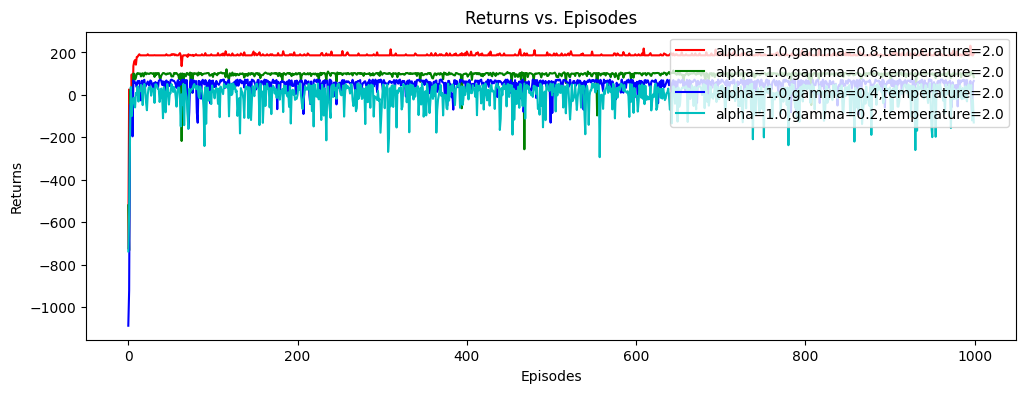

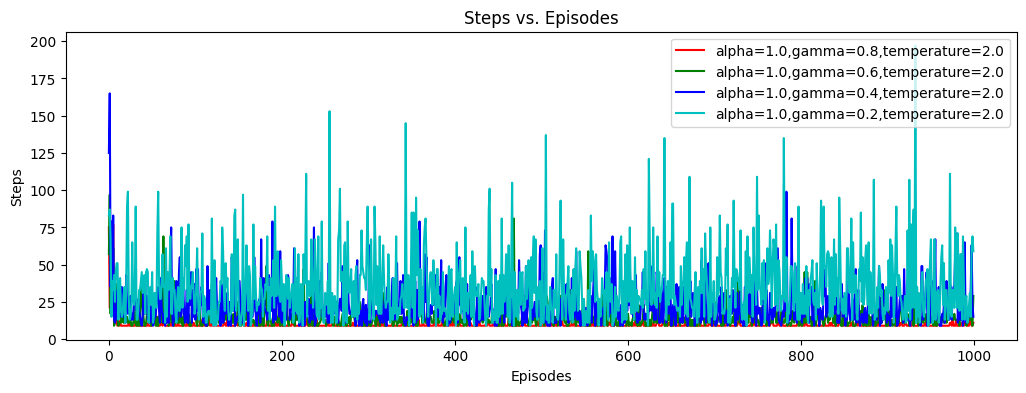

In [ ]:
episodes_0,returns_0,steps_0=Boltzmann_policy(1,0.8,2)
episodes_1,returns_1,steps_1=Boltzmann_policy(1.0,0.6,2)
episodes_2,returns_2,steps_2=Boltzmann_policy(1.0,0.4,2)
episodes_3,returns_3,steps_3=Boltzmann_policy(1.0,0.2,2)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)


plt.plot(episodes_0,returns_0,'r',label=f'alpha=1.0,gamma=0.8,temperature=2.0')
plt.plot(episodes_1,returns_1,'g',label=f'alpha=1.0,gamma=0.6,temperature=2.0')
plt.plot(episodes_2,returns_2,'b',label=f'alpha=1.0,gamma=0.4,temperature=2.0')
plt.plot(episodes_3,returns_3,'c',label=f'alpha=1.0,gamma=0.2,temperature=2.0')
plt.legend(loc="upper right")

plt.title("Returns vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.show()

f = plt.figure()
f.set_figwidth(12.27)
f.set_figheight(4)
plt.plot(episodes_0,steps_0,'r',label=f'alpha=1.0,gamma=0.8,temperature=2.0')
plt.plot(episodes_1,steps_1,'g',label=f'alpha=1.0,gamma=0.6,temperature=2.0')
plt.plot(episodes_2,steps_2,'b',label=f'alpha=1.0,gamma=0.4,temperature=2.0')
plt.plot(episodes_3,steps_3,'c',label=f'alpha=1.0,gamma=0.2,temperature=2.0')
plt.legend(loc="upper right")

plt.title("Steps vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Steps")
plt.show()

#####Exploration Factor

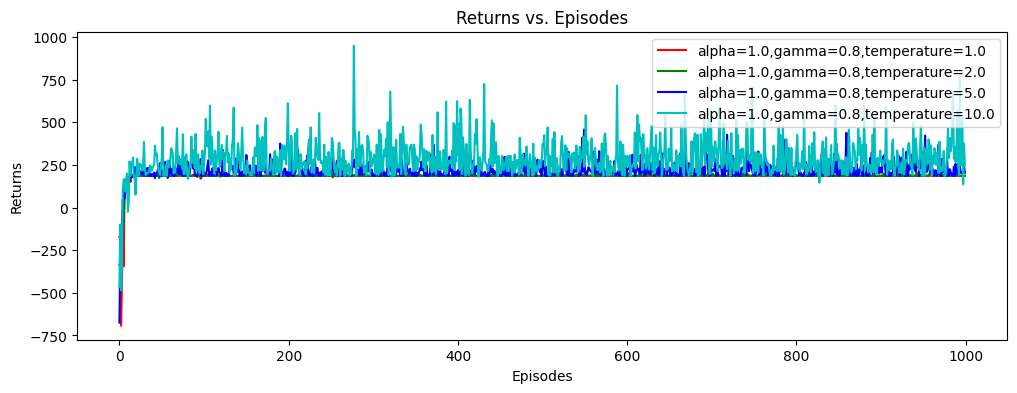

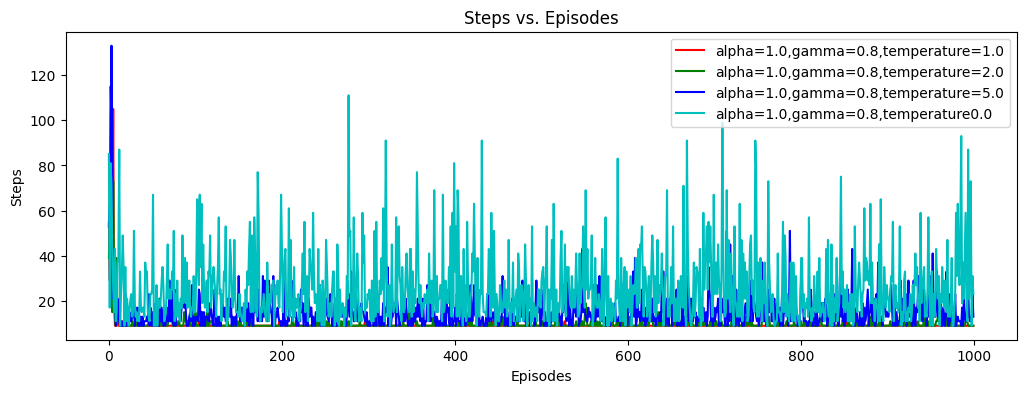

In [ ]:
episodes_0,returns_0,steps_0=Boltzmann_policy(1,0.8,1.0)
episodes_1,returns_1,steps_1=Boltzmann_policy(1,0.8,2.0)
episodes_2,returns_2,steps_2=Boltzmann_policy(1,0.8,5.0)
episodes_3,returns_3,steps_3=Boltzmann_policy(1,0.8,10.0)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)


plt.plot(episodes_0,returns_0,'r',label=f'alpha=1.0,gamma=0.8,temperature=1.0')
plt.plot(episodes_1,returns_1,'g',label=f'alpha=1.0,gamma=0.8,temperature=2.0')
plt.plot(episodes_2,returns_2,'b',label=f'alpha=1.0,gamma=0.8,temperature=5.0')
plt.plot(episodes_3,returns_3,'c',label=f'alpha=1.0,gamma=0.8,temperature=10.0')
plt.legend(loc="upper right")

plt.title("Returns vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.show()

f = plt.figure()
f.set_figwidth(12.27)
f.set_figheight(4)
plt.plot(episodes_0,steps_0,'r',label=f'alpha=1.0,gamma=0.8,temperature=1.0')
plt.plot(episodes_1,steps_1,'g',label=f'alpha=1.0,gamma=0.8,temperature=2.0')
plt.plot(episodes_2,steps_2,'b',label=f'alpha=1.0,gamma=0.8,temperature=5.0')
plt.plot(episodes_3,steps_3,'c',label=f'alpha=1.0,gamma=0.8,temperature0.0')
plt.legend(loc="upper right")

plt.title("Steps vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Steps")
plt.show()

###Upper Confidence Bound Policy

In [ ]:
def Get_next_action(R,Q,state,exploration_parameter,timestep, n_matrix):
  available_actions = np.where(~np.isnan(R[state]))[0]
  q_values = [Q[state,a] for a in available_actions]
  scores = [Q[state, a] + exploration_parameter * np.sqrt(np.log(timestep + 1) / (n_matrix[state, a] + 1)) for a in available_actions]
  a = available_actions[np.argmax(scores)]
  return a

def Switch_state(state,action):
  if (action == 0):
    state = state-1
  elif (action == 1):
    state = state+1
  elif (action == 2):
    state -= 5
  elif (action == 3):
    state += 5

  if (state == 14):
    state += 25

  return state

def upper_bound_confidence(alpha,gamma,exp_factor):
  s = []
  episodes=[]
  returns=[]
  steps=[]
  epsilons=[]
  for i in range(25):
      s.append(str(i) + ',0')
  for i in range(25):
      s.append(str(i) + ',1')

  S = np.array(s)
  A = ['LEFT','RIGHT','UP','DOWN']

  fail_state = ['6,0', '6,1', '18,0', '18,1', '8,0', '8,1', '22,0']
  goal_state = '22,1'

  R =  np.array([[-1.0 for a in A] for s in S])

  for i in range(25):
    R[25+i] = -5

# Populate R matrix with possible actions + rewards until it matches the R matrix given in the tutorial notes.
# Empty = -1
# Cat = -50
# Cheese = 10
# House with cheese = 50
# House without cheese = -20
# Move with cheese = -5

# Slightly faster: define these as a list.
  cat_actions = [(5,1), (30,1), (7,1), (32,1), (17,1), (42,1), (7,0), (32,0), (19,0), (44,0), (9,0), (34,0), (11,2), (36,2), (13,2), (38,2), (23,2), (48,2), (1,3), (26,3), (3,3), (28,3), (13,3), (38,3)]
  cheese_actions = [(13,1), (9,3), (19,2)]
  hoouse_w_cheese = [(42,3), (46,1), (48,0)]
  house_wo_cheese = [(17,3), (23,0), (21,1)]
  boundaries = [(0,0), (5,0), (10,0), (15,0), (20,0), (25,0), (30,0), (35,0), (40,0), (45,0),
                (4,1), (9,1), (14,1), (19,1), (24,1), (29,1), (34,1), (39,1), (44,1), (49,1),
                (0,2), (1,2),  (2,2),  (3,2),  (4,2), (25,2), (26,2), (27,2), (28,2), (29,2),
                (20,3), (21,3), (22,3), (23,3), (24,3), (45,3), (46,3), (47,3), (48,3), (49,3)]

  for s,a in cat_actions:
    R[s,a] = -50
  for s,a in cheese_actions:
    R[s,a] = 10
  for s,a in hoouse_w_cheese:
    R[s,a] = 50
  for s,a in house_wo_cheese:
    R[s,a] = -20
  for s,a in boundaries:
    R[s,a] = np.NaN

# Q matrix
  Q = np.zeros(R.shape)
  N = np.zeros(R.shape)

  for episode in range(20):
    s = 0
    reward=0
    episodes.append(episode)

    for timestep in range(1000):
      a = Get_next_action(R,Q,s,exp_factor,timestep,N)

      # Environment updating
      r = R[s,a]
      s_old = s

      if (a == 0):
        s = s-1
      elif (a == 1):
        s = s+1
      elif (a == 2):
        s -= 5
      elif (a == 3):
        s += 5

      if (s == 14):
        s += 25

      N[s_old, a] += 1
      # Q value updating
      Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])
      reward+=Q[s_old,a]
      if ((S[s] == goal_state)  or timestep>=999):
        steps.append(timestep)
        returns.append(reward)
        break

  Returns=np.array(returns)
  return_avg=Returns.cumsum() / np.arange(1, len(Returns) + 1)
  return episodes,returns,steps

#### Parameter Changes

#####Alpha

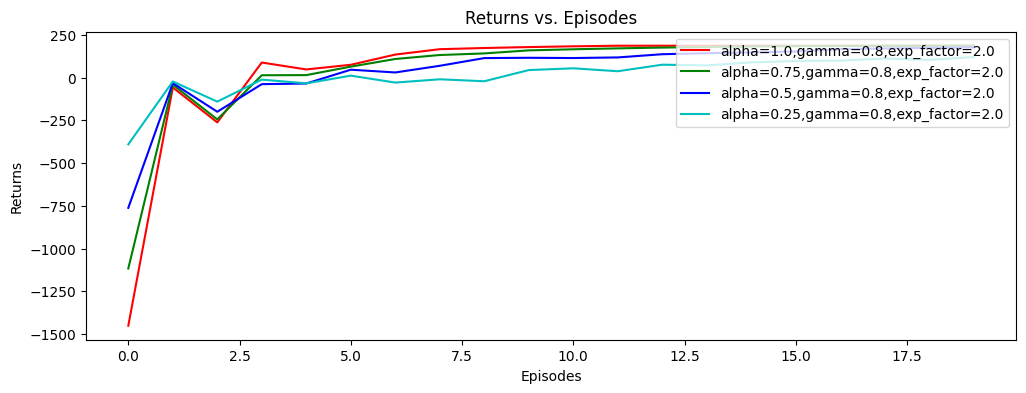

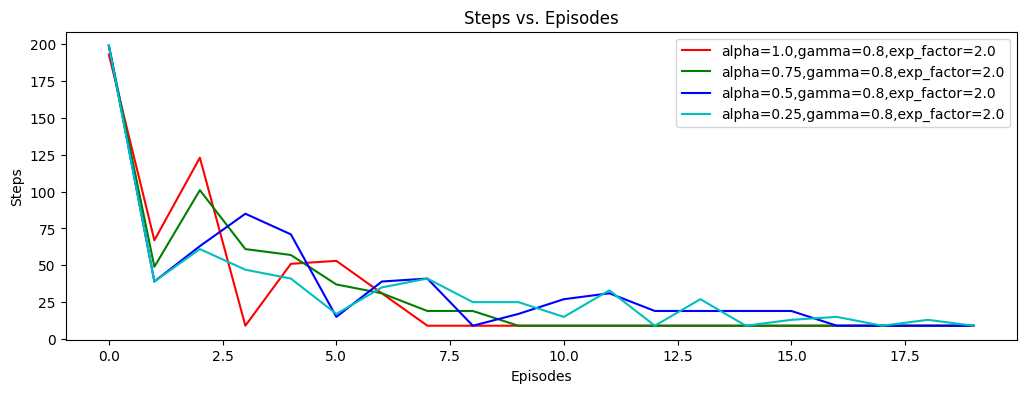

In [ ]:
episodes_0,returns_0,steps_0=upper_bound_confidence(1,0.8,2.0)
episodes_1,returns_1,steps_1=upper_bound_confidence(0.75,0.8,2.0)
episodes_2,returns_2,steps_2=upper_bound_confidence(0.5,0.8,2.0)
episodes_3,returns_3,steps_3=upper_bound_confidence(0.25,0.8,2.0)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)


plt.plot(episodes_0,returns_0,'r',label=f'alpha=1.0,gamma=0.8,exp_factor=2.0')
plt.plot(episodes_1,returns_1,'g',label=f'alpha=0.75,gamma=0.8,exp_factor=2.0')
plt.plot(episodes_2,returns_2,'b',label=f'alpha=0.5,gamma=0.8,exp_factor=2.0')
plt.plot(episodes_3,returns_3,'c',label=f'alpha=0.25,gamma=0.8,exp_factor=2.0')
plt.legend(loc="upper right")

plt.title("Returns vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.show()

f = plt.figure()
f.set_figwidth(12.27)
f.set_figheight(4)
plt.plot(episodes_0,steps_0,'r',label=f'alpha=1.0,gamma=0.8,exp_factor=2.0')
plt.plot(episodes_1,steps_1,'g',label=f'alpha=0.75,gamma=0.8,exp_factor=2.0')
plt.plot(episodes_2,steps_2,'b',label=f'alpha=0.5,gamma=0.8,exp_factor=2.0')
plt.plot(episodes_3,steps_3,'c',label=f'alpha=0.25,gamma=0.8,exp_factor=2.0')
plt.legend(loc="upper right")

plt.title("Steps vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Steps")
plt.show()

#####Gamma

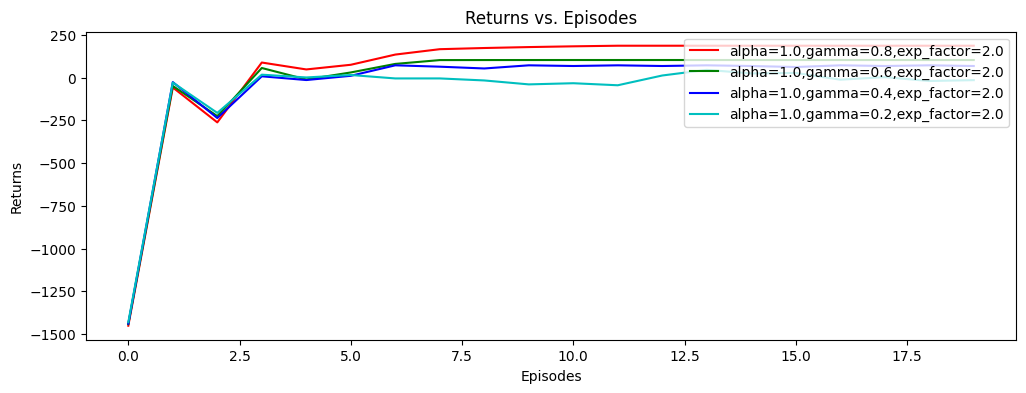

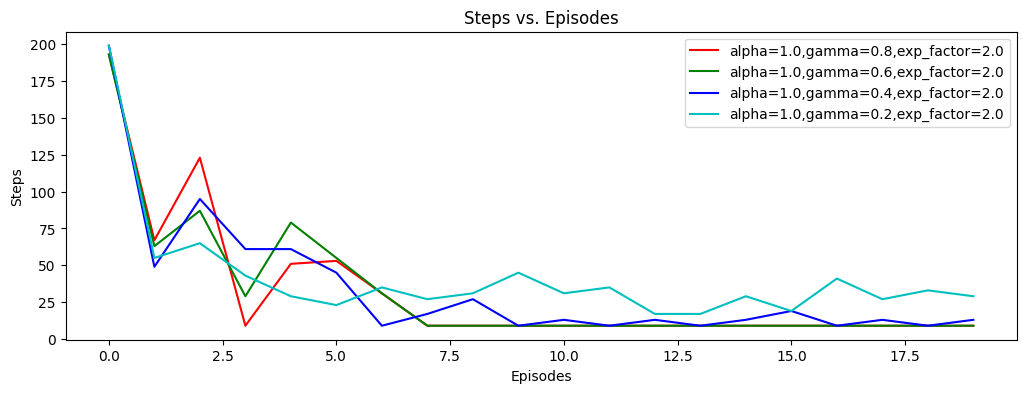

In [ ]:
episodes_0,returns_0,steps_0=upper_bound_confidence(1,0.8,2.0)
episodes_1,returns_1,steps_1=upper_bound_confidence(1,0.6,2.0)
episodes_2,returns_2,steps_2=upper_bound_confidence(1,0.4,2.0)
episodes_3,returns_3,steps_3=upper_bound_confidence(1,0.2,2.0)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)


plt.plot(episodes_0,returns_0,'r',label=f'alpha=1.0,gamma=0.8,exp_factor=2.0')
plt.plot(episodes_1,returns_1,'g',label=f'alpha=1.0,gamma=0.6,exp_factor=2.0')
plt.plot(episodes_2,returns_2,'b',label=f'alpha=1.0,gamma=0.4,exp_factor=2.0')
plt.plot(episodes_3,returns_3,'c',label=f'alpha=1.0,gamma=0.2,exp_factor=2.0')
plt.legend(loc="upper right")

plt.title("Returns vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.show()

f = plt.figure()
f.set_figwidth(12.27)
f.set_figheight(4)
plt.plot(episodes_0,steps_0,'r',label=f'alpha=1.0,gamma=0.8,exp_factor=2.0')
plt.plot(episodes_1,steps_1,'g',label=f'alpha=1.0,gamma=0.6,exp_factor=2.0')
plt.plot(episodes_2,steps_2,'b',label=f'alpha=1.0,gamma=0.4,exp_factor=2.0')
plt.plot(episodes_3,steps_3,'c',label=f'alpha=1.0,gamma=0.2,exp_factor=2.0')
plt.legend(loc="upper right")

plt.title("Steps vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Steps")
plt.show()

#####Exploration Factor

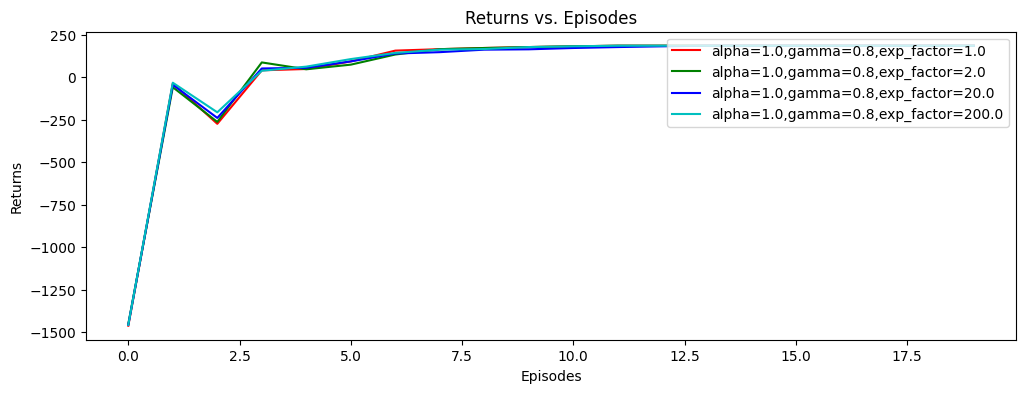

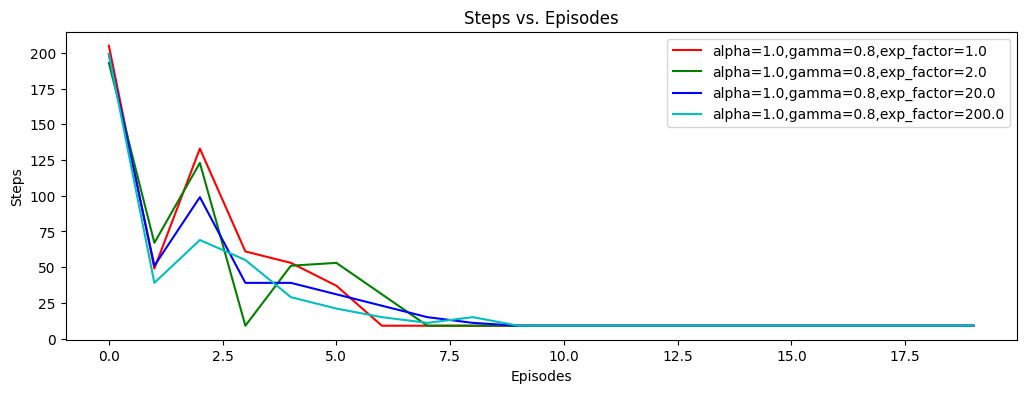

In [ ]:
episodes_0,returns_0,steps_0=upper_bound_confidence(1,0.8,1.0)
episodes_1,returns_1,steps_1=upper_bound_confidence(1,0.8,2.0)
episodes_2,returns_2,steps_2=upper_bound_confidence(1,0.8,5.0)
episodes_3,returns_3,steps_3=upper_bound_confidence(1,0.8,10.0)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)


plt.plot(episodes_0,returns_0,'r',label=f'alpha=1.0,gamma=0.8,exp_factor=1.0')
plt.plot(episodes_1,returns_1,'g',label=f'alpha=1.0,gamma=0.8,exp_factor=2.0')
plt.plot(episodes_2,returns_2,'b',label=f'alpha=1.0,gamma=0.8,exp_factor=20.0')
plt.plot(episodes_3,returns_3,'c',label=f'alpha=1.0,gamma=0.8,exp_factor=200.0')
plt.legend(loc="upper right")

plt.title("Returns vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.show()

f = plt.figure()
f.set_figwidth(12.27)
f.set_figheight(4)
plt.plot(episodes_0,steps_0,'r',label=f'alpha=1.0,gamma=0.8,exp_factor=1.0')
plt.plot(episodes_1,steps_1,'g',label=f'alpha=1.0,gamma=0.8,exp_factor=2.0')
plt.plot(episodes_2,steps_2,'b',label=f'alpha=1.0,gamma=0.8,exp_factor=20.0')
plt.plot(episodes_3,steps_3,'c',label=f'alpha=1.0,gamma=0.8,exp_factor=200.0')
plt.legend(loc="upper right")

plt.title("Steps vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Steps")
plt.show()